# Digital image processing

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Input
from tensorflow.keras.preprocessing import image

### Download sample data

In [21]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')
print(data_dir)

C:\Users\miche\.keras\datasets\flower_photos


### Analyze data

3670
C:\Users\miche\.keras\datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


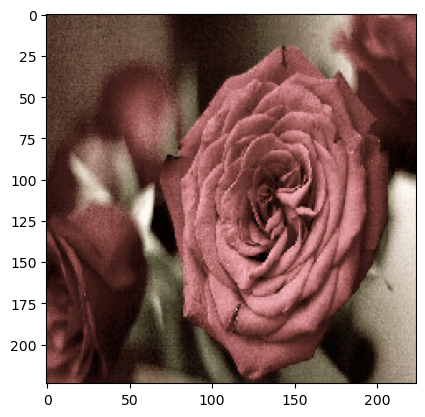

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
roses = list(data_dir.glob('roses/*'))
print(roses[0])
img = image.load_img(str(roses[12]), target_size=(224,224))
plt.imshow(img)

### Preprossing images

In [23]:
in_img = image.img_to_array(img)
print(in_img.shape)
# print(in_img)
in_img = np.expand_dims(in_img, axis=0)
print(in_img.shape)
in_img /= 255.0



(224, 224, 3)
(1, 224, 224, 3)


### Set up a simple model

In [78]:
def MyModel():
    inputs = Input(shape=(224,224,3))
    x = Conv2D(8,(3,3), padding='same', )(inputs)
    x = Activation('relu')(x)
    x = Conv2D(8,(3,3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPool2D((2,2),2)(x)

    model = Model(inputs, x)
    return model

model = MyModel()
model.summary()



Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 activation_8 (Activation)   (None, 224, 224, 8)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 8)       584       
                                                                 
 activation_9 (Activation)   (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 8)       0         
 g2D)                                                            
                                                          

### get layers info

In [90]:
def show_layer(layer):   
    
    for i in range(0, layer.shape[3]):
        plt.subplot(1,layer.shape[3],i + 1)
        plt.imshow(layer[0,:,:,i])
        plt.xticks([])
        plt.yticks([])
    plt.show()


1/1 [==============================] - 0s 41ms/step
(1, 224, 224, 8)
5


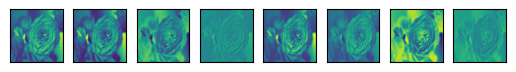

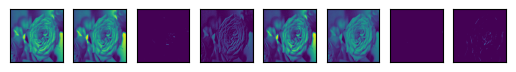

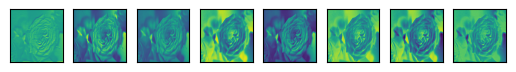

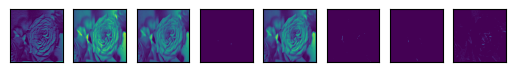

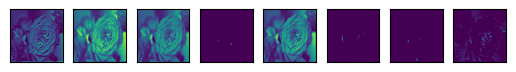

In [91]:
# layer_outputs = [model.get_layer(i).output for i in range(1, len(model.layers))]

layer_names = ['conv2d_8','activation_8','conv2d_9',
               'activation_9','max_pooling2d_4']
#
layer_outputs = [model.get_layer(layer_name).output for layer_name in layer_names]
#
activation_model = Model(model.inputs, layer_outputs)
activations = activation_model.predict(in_img)

first_conv_layer = activations[0]
print(first_conv_layer.shape)
print(len(activations))

for layer in activations:
    show_layer(layer)


### Predit on test dataset


### Output

In [ ]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)